## Supplementary Figure 13

PCA coordinates and profile reproducibility

Related to Figure 2.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "figureS13_pca_reproducibility")
extensions <- c(".png", ".pdf")

In [3]:
# Load PCA embeddings
results_dir <- file.path("..", "1.Data-exploration", "results")

input_file <- file.path(results_dir, "cell_painting_pca.tsv.gz")

cp_pca_cols <- readr::cols(
  .default = readr::col_character(),
  Metadata_dose_recode = readr::col_double(),
  pca_1 = readr::col_double(),
  pca_2 = readr::col_double(),
  pca_3 = readr::col_double(),
  pca_4 = readr::col_double(),
  pca_5 = readr::col_double(),
  no_of_compounds = readr::col_double(),
  dose_recode = readr::col_double(),
  median_score = readr::col_double(),
  p_value = readr::col_double(),
  pass_thresh = readr::col_logical(),
  neg_log_10_p_val = readr::col_double()
)
cp_pca_df <- readr::read_tsv(input_file, col_types = cp_pca_cols) %>%
    dplyr::mutate(dataset = "Cell Painting") %>%
    dplyr::select(pca_1, pca_2, pca_3, pca_4, pca_5, dataset, median_score, p_value, dose_recode, pass_thresh)

input_file <- file.path(results_dir, "l1000_pca.tsv.gz")

l1000_pca_cols <- readr::cols(
    .default = readr::col_character(),
    dose_x = readr::col_double(),
    pca_1 = readr::col_double(),
    pca_2 = readr::col_double(),
    pca_3 = readr::col_double(),
    pca_4 = readr::col_double(),
    pca_5 = readr::col_double(),
    no_of_compounds = readr::col_double(),
    dose_recode = readr::col_double(),
    median_score = readr::col_double(),
    p_value = readr::col_double(),
    pass_thresh = readr::col_logical(),
    neg_log_10_p_val = readr::col_double()
)

l1000_pca_df <- readr::read_tsv(input_file, col_types = l1000_pca_cols) %>%
    dplyr::mutate(dataset = "L1000") %>%
    dplyr::select(pca_1, pca_2, pca_3, pca_4, pca_5, dataset, median_score, p_value, dose_recode, pass_thresh)

pca_df <- dplyr::bind_rows(cp_pca_df, l1000_pca_df) %>%
    dplyr::mutate(neg_log_p_val = -log10(p_value)) %>%
    dplyr::mutate(dose = dose_recode)

pca_df[pca_df$neg_log_p_val == max(pca_df$neg_log_p_val), "neg_log_p_val"] = (
    max(pca_df$neg_log_p_val[!is.infinite(pca_df$neg_log_p_val)])
    )

pca_df$dose <- dplyr::recode_factor(pca_df$dose_recode, !!!dose_rename)
pca_df$dose <- factor(pca_df$dose, levels = dose_order)

print(dim(pca_df))
head(pca_df)

[1] 59477    12


pca_1,pca_2,pca_3,pca_4,pca_5,dataset,median_score,p_value,dose_recode,pass_thresh,neg_log_p_val,dose
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<fct>
-28.94482,1.535795,-2.8694438,5.001031,0.5459962,Cell Painting,0.02949389,0.379,6,FALSE,0.4213608,10 uM
-30.47528,4.157416,-1.3450503,3.706364,-2.7846730,Cell Painting,0.02949389,0.379,6,FALSE,0.4213608,10 uM
-28.83797,3.111713,-0.1096956,2.670449,0.6403484,Cell Painting,0.02949389,0.379,6,FALSE,0.4213608,10 uM
-29.77137,1.666551,1.1329623,4.891540,0.9990921,Cell Painting,0.02949389,0.379,6,FALSE,0.4213608,10 uM
-27.96077,3.484735,0.3322358,3.591972,-2.8903267,Cell Painting,0.02949389,0.379,6,FALSE,0.4213608,10 uM
-27.37439,1.889247,-1.3290038,5.594579,0.5485518,Cell Painting,0.03813789,0.121,5,FALSE,0.9172146,3.33 uM


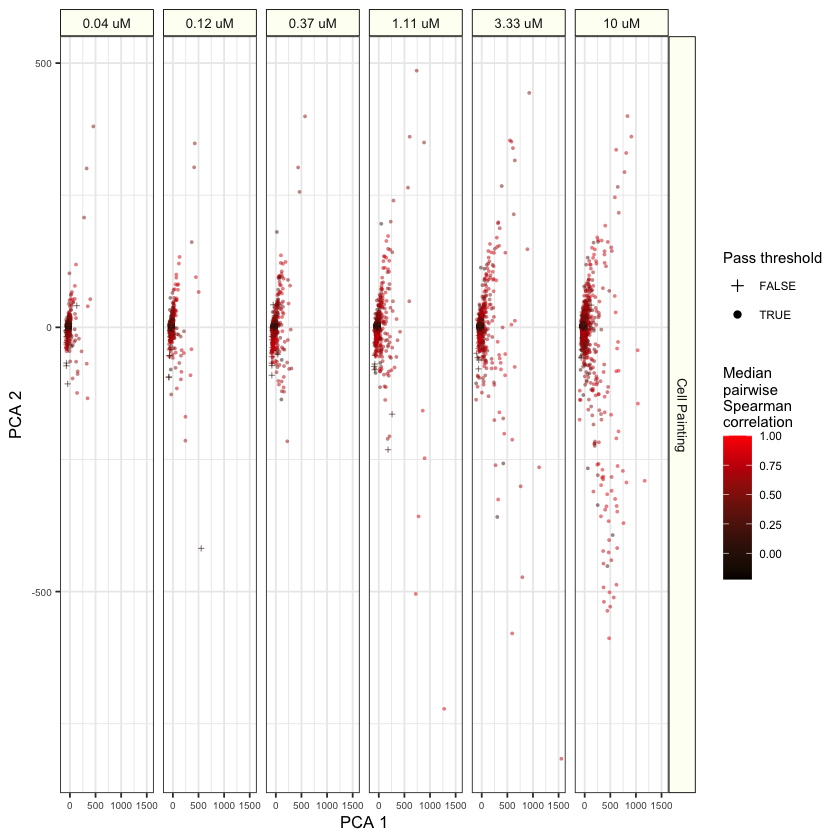

In [4]:
panel_a1_gg <- (
    ggplot(
        pca_df %>% dplyr::filter(dataset == "Cell Painting"),
        aes(x = pca_1, y = pca_2, color = median_score)
    )
    + geom_point(aes(shape = pass_thresh), alpha = 0.5, size = 0.75)
    + figure_theme
    + theme(axis.text = element_text(size = 6))
    + facet_grid("dataset~dose", scales = "fixed")
    + xlab("PCA 1")
    + ylab("PCA 2")
    + scale_shape_manual("Pass threshold", values = c("FALSE" = 3, "TRUE" = 16))
    + scale_color_gradient(name = "Median\npairwise\nSpearman\ncorrelation", limits = c(min(pca_df$median_score), 1),
                           low = "black", high = "red", na.value = "grey")
    + guides(shape = guide_legend(override.aes = list(alpha = 1, color = "black", size = 2)))
)

panel_a1_gg

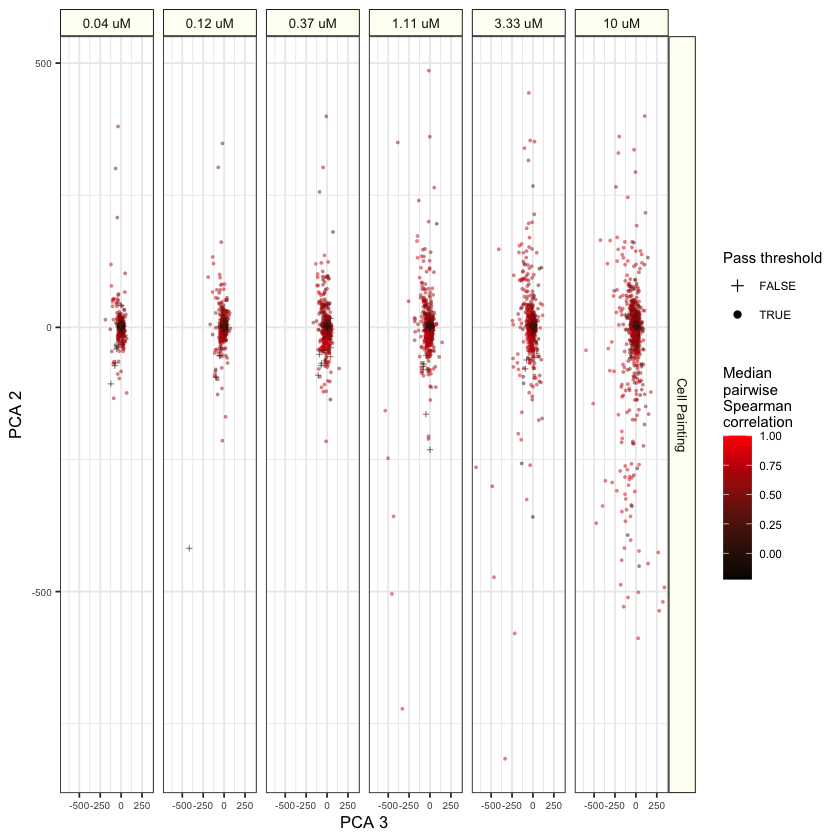

In [5]:
panel_a2_gg <- (
    ggplot(
        pca_df %>% dplyr::filter(dataset == "Cell Painting"),
        aes(x = pca_3, y = pca_2, color = median_score)
    )
    + geom_point(aes(shape = pass_thresh), alpha = 0.5, size = 0.75)
    + figure_theme
    + theme(axis.text = element_text(size = 6))
    + facet_grid("dataset~dose", scales = "fixed")
    + xlab("PCA 3")
    + ylab("PCA 2")
    + scale_shape_manual("Pass threshold", values = c("FALSE" = 3, "TRUE" = 16))
    + scale_color_gradient(name = "Median\npairwise\nSpearman\ncorrelation", limits = c(min(pca_df$median_score), 1),
                           low = "black", high = "red", na.value = "grey")
    + guides(shape = guide_legend(override.aes = list(alpha = 1, color = "black", size = 2)))
)

panel_a2_gg

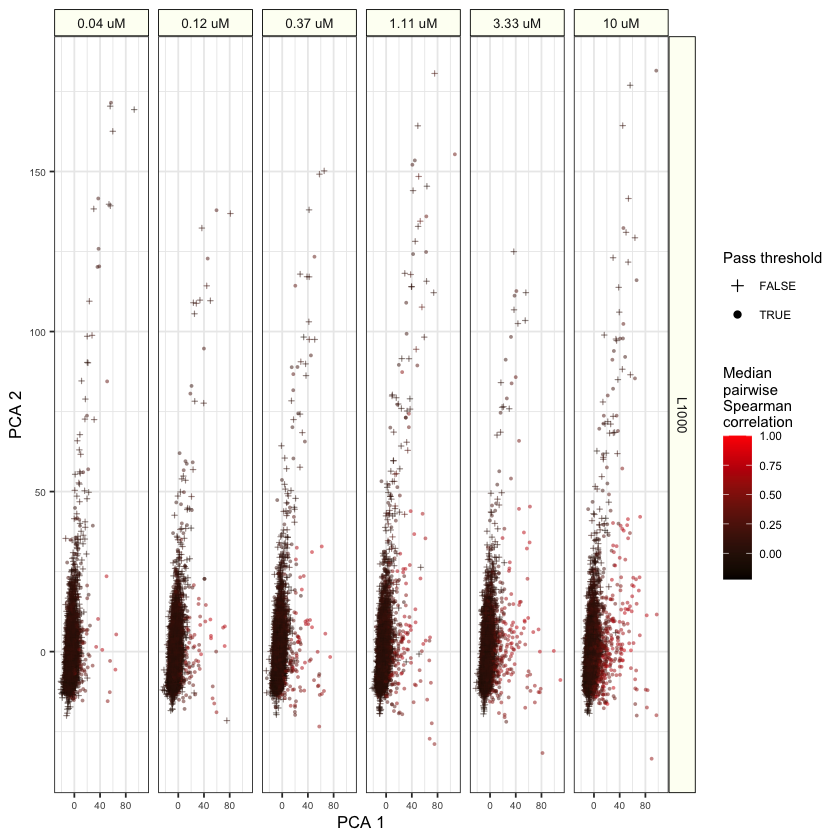

In [6]:
panel_b1_gg <- (
    ggplot(
        pca_df %>% dplyr::filter(dataset == "L1000"),
        aes(x = pca_1, y = pca_2, color = median_score)
    )
    + geom_point(aes(shape = pass_thresh), alpha = 0.5, size = 0.75)
    + figure_theme
    + theme(axis.text = element_text(size = 6))
    + facet_grid("dataset~dose", scales = "fixed")
    + xlab("PCA 1")
    + ylab("PCA 2")
    + scale_shape_manual("Pass threshold", values = c("FALSE" = 3, "TRUE" = 16))
    + scale_color_gradient(name = "Median\npairwise\nSpearman\ncorrelation", limits = c(min(pca_df$median_score), 1),
                           low = "black", high = "red", na.value = "grey")
    + guides(shape = guide_legend(override.aes = list(alpha = 1, color = "black", size = 2)))
)

panel_b1_gg

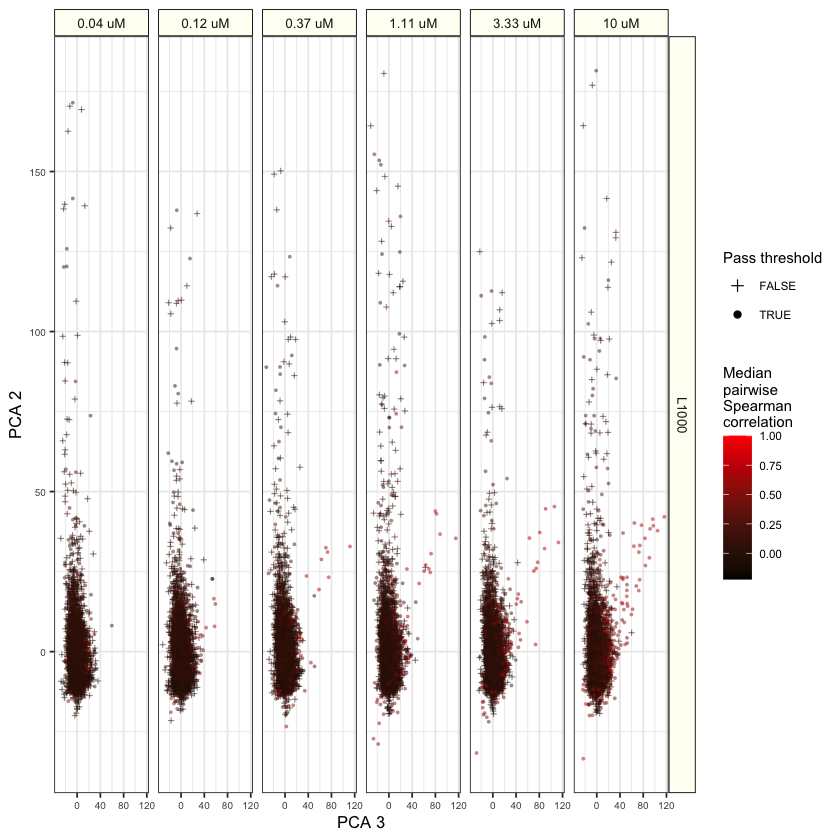

In [7]:
panel_b2_gg <- (
    ggplot(
        pca_df %>% dplyr::filter(dataset == "L1000"),
        aes(x = pca_3, y = pca_2, color = median_score)
    )
    + geom_point(aes(shape = pass_thresh), alpha = 0.5, size = 0.75)
    + figure_theme
    + theme(axis.text = element_text(size = 6))
    + facet_grid("dataset~dose", scales = "fixed")
    + xlab("PCA 3")
    + ylab("PCA 2")
    + scale_shape_manual("Pass threshold", values = c("FALSE" = 3, "TRUE" = 16))
    + scale_color_gradient(name = "Median\npairwise\nSpearman\ncorrelation", limits = c(min(pca_df$median_score), 1),
                       low = "black", high = "red", na.value = "grey")
    + guides(shape = guide_legend(override.aes = list(alpha = 1, color = "black", size = 2)))
)

panel_b2_gg

In [8]:
legend <- cowplot::get_legend(panel_a1_gg)

panel_a1_gg <- panel_a1_gg + theme(legend.position = "none") + labs(tag = "a")
panel_a2_gg <- panel_a2_gg + theme(legend.position = "none") + labs(tag = "")
panel_b1_gg <- panel_b1_gg + theme(legend.position = "none") + labs(tag = "b")
panel_b2_gg <- panel_b2_gg + theme(legend.position = "none") + labs(tag = "")

## Compile supplementary figure

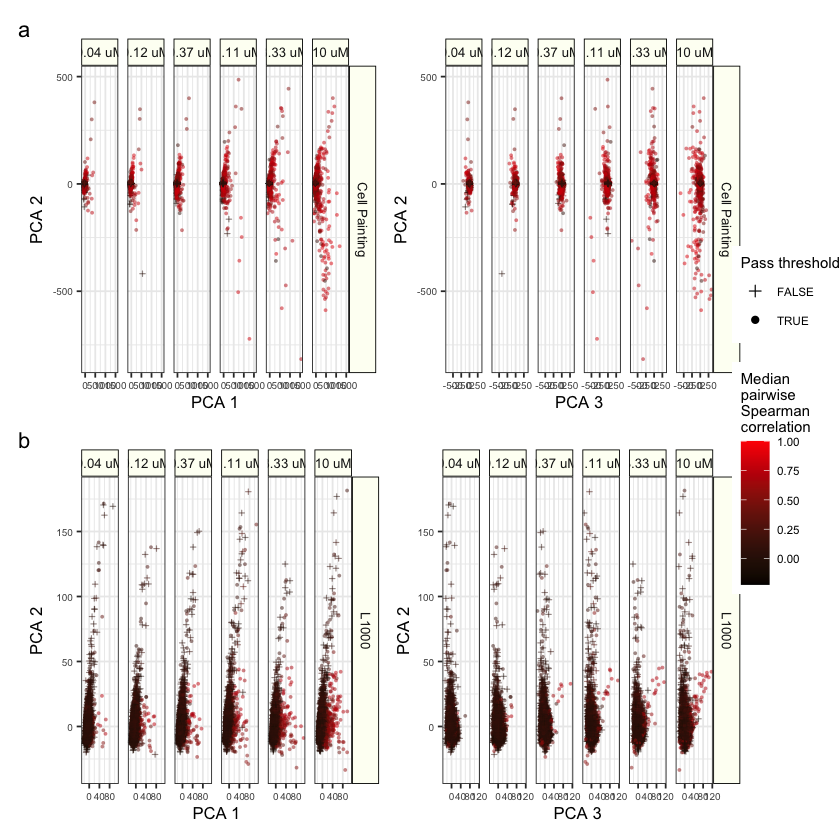

In [9]:
pca_supfig_gg <- (
    (
        (
            panel_a1_gg + panel_a2_gg
        ) /
        (
            panel_b1_gg + panel_b2_gg
        )
    ) + plot_layout(heights = c(2, 2)) | (
        legend
    )
) + plot_layout(widths = c(1, 0.1))

pca_supfig_gg

In [10]:
for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, pca_supfig_gg, height = 6, width = 12, dpi = 500)
}